In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
data = pd.read_csv('weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


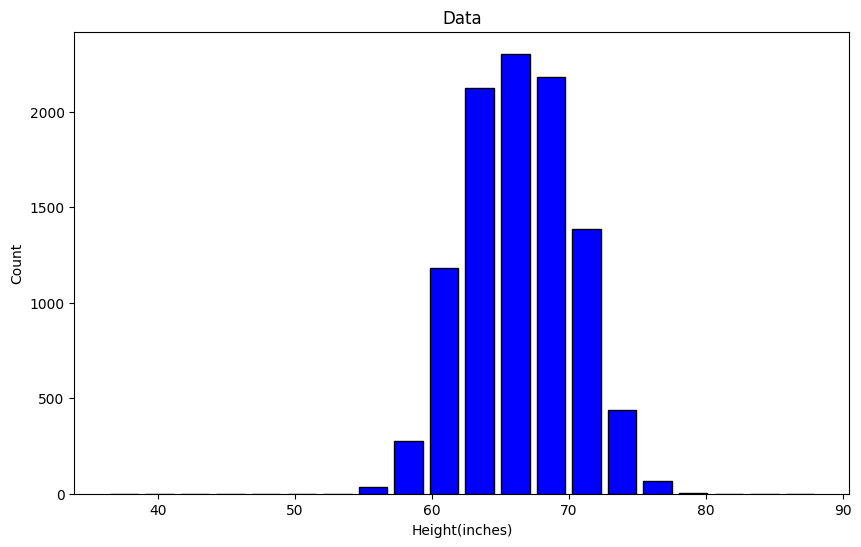

In [4]:
plt.hist(data['Height'], bins=20, color='blue', edgecolor='black', rwidth=0.8)

# Adding labels and title
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.title('Data')

# Show the plot
plt.show()

In [5]:
from scipy.stats import norm

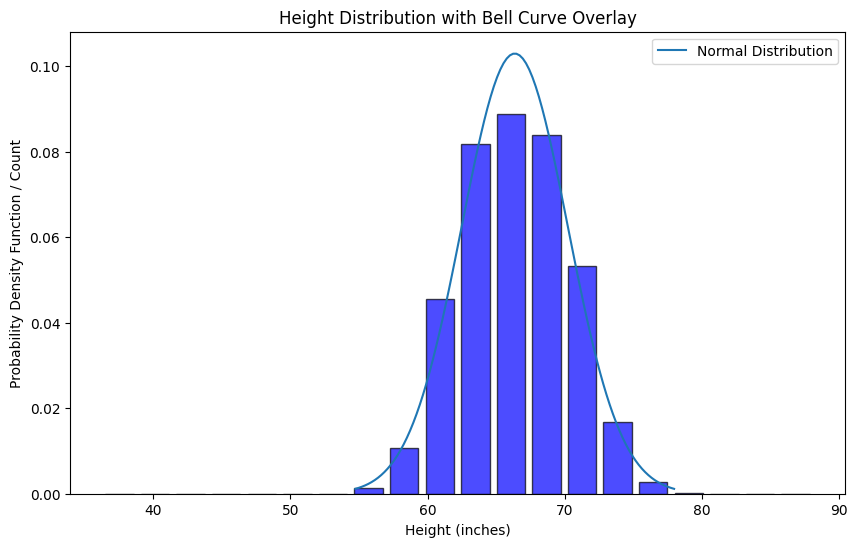

In [6]:
height_data = data['Height']

# Calculate mean and standard deviation
mu = height_data.mean()
sigma = height_data.std()

# Generate data points for the normal distribution
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the bell curve
plt.plot(x, y, label='Normal Distribution')

# Plot the histogram
plt.hist(height_data, bins=20, color='blue', edgecolor='black', rwidth=0.8, density=True, alpha=0.7)

# Adding labels and title
plt.xlabel('Height (inches)')
plt.ylabel('Probability Density Function / Count')
plt.title('Height Distribution with Bell Curve Overlay')

# Show a legend
plt.legend()

# Show the plot
plt.show()

In [7]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.363960,161.482357
std,3.874055,32.313861
min,36.233904,64.700127
25%,63.504388,135.818051
50%,66.317827,161.212928
75%,69.177202,187.169525
max,88.144033,490.513487


In [8]:
data.Height.mean()

66.36395975482125

In [9]:
data.Height.std()

3.874054935172441

In [10]:
#standard deviation to remove outliers
upper_limit = mu + 3 * sigma
upper_limit

77.98612456033857

In [11]:
lower_limit = mu - 3 * sigma
lower_limit

54.74179494930393

In [12]:
data[(data.Height>upper_limit) | (data.Height<lower_limit)]

,Gender,Height,Weight
25,Male,88.144033,192.343977
55,Male,40.499550,163.309528
403,Male,36.233904,183.161232
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [13]:
#Remove outliers
new_data_no_ouliers = data[(data.Height<upper_limit) & (data.Height>lower_limit)]

In [14]:
new_data_no_ouliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [15]:
new_data_no_ouliers.shape

(9990, 3)

In [16]:
#see how many outliers removed

data.Height.shape[0] - new_data_no_ouliers.shape[0]

10

2. FIND OUTLIERS BY ZSCORE

In [17]:
#calculate  the zscore
#zscore is the (value - mean)/ standard deviation

data['z_score'] = (data.Height - mu)/sigma

In [18]:
data

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.931583
1,Male,68.781904,162.310473,0.624138
2,Male,74.110105,212.740856,1.999493
3,Male,71.730978,220.042470,1.385375
4,Male,69.881796,206.349801,0.908050
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.049382
9996,Female,67.067155,170.867906,0.181514
9997,Female,63.867992,128.475319,-0.644278
9998,Female,69.034243,163.852461,0.689273


In [19]:
#detect outliers by bringing out values with the zscire more than 3

outliers_ish = data[data['z_score']>3]

outliers_ish

,Gender,Height,Weight,z_score
25,Male,88.144033,192.343977,5.622035
994,Male,78.095867,255.690835,3.028328
1317,Male,78.462053,227.342565,3.122850
2014,Male,78.998742,269.989699,3.261384
3285,Male,78.528210,253.889004,3.139927
3757,Male,78.621374,245.733783,3.163975


In [20]:
#detect other outliers by bringing out values with the zscire less than -0

outliers_ish2 = data[data['z_score']<-3]

outliers_ish2

,Gender,Height,Weight,z_score
55,Male,40.499550,163.309528,-6.676315
403,Male,36.233904,183.161232,-7.777395
6624,Female,54.616858,71.393749,-3.032250
9285,Female,54.263133,64.700127,-3.123556


In [21]:
data[(data['z_score']>3) | (data['z_score']>-3)]

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.931583
1,Male,68.781904,162.310473,0.624138
2,Male,74.110105,212.740856,1.999493
3,Male,71.730978,220.042470,1.385375
4,Male,69.881796,206.349801,0.908050
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.049382
9996,Female,67.067155,170.867906,0.181514
9997,Female,63.867992,128.475319,-0.644278
9998,Female,69.034243,163.852461,0.689273
